## Clasificación de imágenes
Para este ejemplo vas a montar un clasificador de imágenes del 0 al 9.

In [3]:
# import numpy as np

In [1]:
from sklearn.datasets import load_digits
digits = load_digits() # 8x8 = 64 pixels  -- Very clean Dataset 

#### Now that you have the dataset loaded you can use the commands below

In [3]:
digits.keys()

dict_keys(['data', 'target', 'frame', 'feature_names', 'target_names', 'images', 'DESCR'])

In [4]:
print(digits['DESCR'])

.. _digits_dataset:

Optical recognition of handwritten digits dataset
--------------------------------------------------

**Data Set Characteristics:**

:Number of Instances: 1797
:Number of Attributes: 64
:Attribute Information: 8x8 image of integer pixels in the range 0..16.
:Missing Attribute Values: None
:Creator: E. Alpaydin (alpaydin '@' boun.edu.tr)
:Date: July; 1998

This is a copy of the test set of the UCI ML hand-written digits datasets
https://archive.ics.uci.edu/ml/datasets/Optical+Recognition+of+Handwritten+Digits

The data set contains images of hand-written digits: 10 classes where
each class refers to a digit.

Preprocessing programs made available by NIST were used to extract
normalized bitmaps of handwritten digits from a preprinted form. From a
total of 43 people, 30 contributed to the training set and different 13
to the test set. 32x32 bitmaps are divided into nonoverlapping blocks of
4x4 and the number of on pixels are counted in each block. This generates
an in

In [5]:
# Print to show there are 1797 images (8 by 8 images for a dimensionality of 64)
print("Image Data Shape" , digits.data.shape)
# Print to show there are 1797 labels (integers from 0–9)
print("Label Data Shape", digits.target.shape)

Image Data Shape (1797, 64)
Label Data Shape (1797,)


In [6]:
digits['data'][34]

array([ 0.,  0.,  0.,  5., 14.,  2.,  0.,  0.,  0.,  0.,  1., 13., 11.,
        0.,  0.,  0.,  0.,  0.,  5., 16.,  2.,  0.,  0.,  0.,  0.,  0.,
        6., 15.,  5.,  0.,  0.,  0.,  0.,  1., 15., 16., 15., 11.,  1.,
        0.,  0.,  2., 13., 14.,  1., 12.,  9.,  0.,  0.,  0.,  4., 16.,
        7., 13.,  9.,  0.,  0.,  0.,  0.,  5., 16., 15.,  3.,  0.])

In [ ]:
digits['target'][34]     # la etiq de la img ... los ptos correspondientes del numero 6

np.int64(6)

In [8]:
set(digits.target)

{np.int64(0),
 np.int64(1),
 np.int64(2),
 np.int64(3),
 np.int64(4),
 np.int64(5),
 np.int64(6),
 np.int64(7),
 np.int64(8),
 np.int64(9)}

#### Check the dataset

In [10]:
import pandas as pd

df = pd.DataFrame(data= digits['data'])
df['target'] = digits['target']
df

,0,1,2,3,4,5,6,7,8,9,...,55,56,57,58,59,60,61,62,63,target
0,0.0,0.0,5.0,13.0,9.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,6.0,13.0,10.0,0.0,0.0,0.0,0
1,0.0,0.0,0.0,12.0,13.0,5.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,11.0,16.0,10.0,0.0,0.0,1
2,0.0,0.0,0.0,4.0,15.0,12.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,3.0,11.0,16.0,9.0,0.0,2
3,0.0,0.0,7.0,15.0,13.0,1.0,0.0,0.0,0.0,8.0,...,0.0,0.0,0.0,7.0,13.0,13.0,9.0,0.0,0.0,3
4,0.0,0.0,0.0,1.0,11.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,2.0,16.0,4.0,0.0,0.0,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1792,0.0,0.0,4.0,10.0,13.0,6.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,2.0,14.0,15.0,9.0,0.0,0.0,9
1793,0.0,0.0,6.0,16.0,13.0,11.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,6.0,16.0,14.0,6.0,0.0,0.0,0
1794,0.0,0.0,1.0,11.0,15.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,2.0,9.0,13.0,6.0,0.0,0.0,8
1795,0.0,0.0,2.0,10.0,7.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,5.0,12.0,16.0,12.0,0.0,0.0,9


#### Check the target

In [11]:
digits.target

array([0, 1, 2, ..., 8, 9, 8], shape=(1797,))

In [ ]:
df.target.value_counts()        # distribucion de representaciones de los nº

target
3    183
1    182
5    182
4    181
6    181
9    180
7    179
0    178
2    177
8    174
Name: count, dtype: int64

In [13]:
digits.target[0:50]

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 0, 1,
       2, 3, 4, 5, 6, 7, 8, 9, 0, 9, 5, 5, 6, 5, 0, 9, 8, 9, 8, 4, 1, 7,
       7, 3, 5, 1, 0, 0])

In [14]:
digits.data[0]

array([ 0.,  0.,  5., 13.,  9.,  1.,  0.,  0.,  0.,  0., 13., 15., 10.,
       15.,  5.,  0.,  0.,  3., 15.,  2.,  0., 11.,  8.,  0.,  0.,  4.,
       12.,  0.,  0.,  8.,  8.,  0.,  0.,  5.,  8.,  0.,  0.,  9.,  8.,
        0.,  0.,  4., 11.,  0.,  1., 12.,  7.,  0.,  0.,  2., 14.,  5.,
       10., 12.,  0.,  0.,  0.,  0.,  6., 13., 10.,  0.,  0.,  0.])

In [15]:
print(digits.data[0].reshape(8,8))  # 0 mas cercano a blanco, 15 mas negro (de 12-15 color)

[[ 0.  0.  5. 13.  9.  1.  0.  0.]
 [ 0.  0. 13. 15. 10. 15.  5.  0.]
 [ 0.  3. 15.  2.  0. 11.  8.  0.]
 [ 0.  4. 12.  0.  0.  8.  8.  0.]
 [ 0.  5.  8.  0.  0.  9.  8.  0.]
 [ 0.  4. 11.  0.  1. 12.  7.  0.]
 [ 0.  2. 14.  5. 10. 12.  0.  0.]
 [ 0.  0.  6. 13. 10.  0.  0.  0.]]


#### Plot some numbers

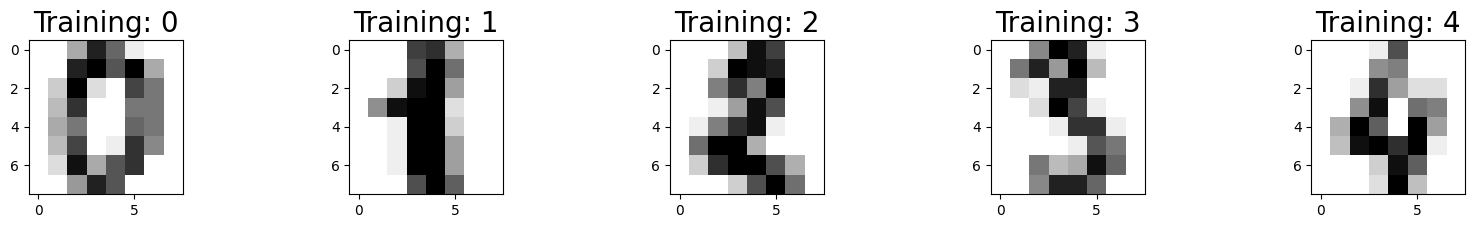

In [16]:
import numpy as np 
import matplotlib.pyplot as plt
plt.figure(figsize=(20,2))
for index, (image, label) in enumerate(zip(digits.data[0:5], digits.target[0:5])):
    plt.subplot(1, 5, index + 1)
    plt.imshow(np.reshape(image, (8,8)), cmap='binary')
    #plt.title('Training: %i\n' % label, fontsize = 20)
    plt.title('Training: ' + str(label), fontsize = 20)

In [17]:
8*8

64

### Splitting Data into Training and Test Sets (Digits Dataset)

In [18]:
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(digits.data,
                                                   digits.target,
                                                   test_size = 0.25,
                                                   random_state=0)

In [19]:
x_train

array([[ 0.,  3., 13., ..., 12.,  9.,  1.],
       [ 0.,  0.,  1., ..., 13.,  1.,  0.],
       [ 0.,  0.,  4., ...,  9.,  0.,  0.],
       ...,
       [ 0.,  0.,  5., ...,  0.,  0.,  0.],
       [ 0.,  0.,  4., ...,  0.,  0.,  0.],
       [ 0.,  0.,  6., ..., 11.,  0.,  0.]], shape=(1347, 64))

In [20]:
from sklearn.linear_model import LogisticRegression

logisticRegr = LogisticRegression(max_iter=10000)
logisticRegr.fit(x_train, y_train)

LogisticRegression(max_iter=10000)

In [21]:
x_train.size

86208

In [22]:
logisticRegr.score(x_test, y_test)

0.9533333333333334

In [23]:
logisticRegr.classes_

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9])

### To predict

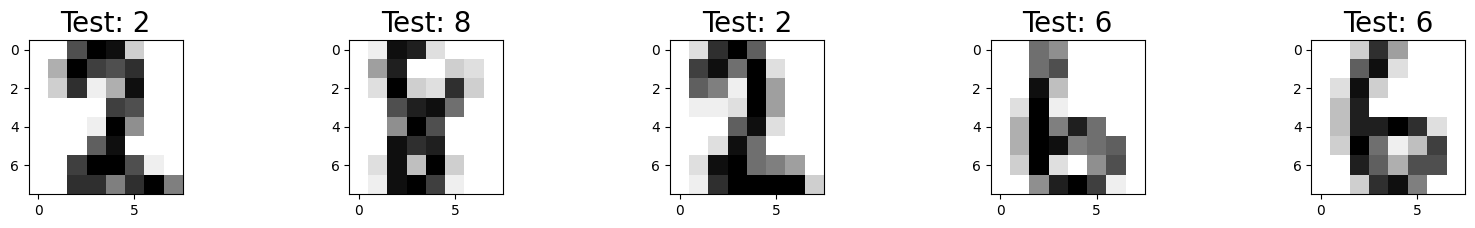

In [24]:
plt.figure(figsize=(20,2))
for index, (image, label) in enumerate(zip(x_test[0:5], y_test[0:5])):
    plt.subplot(1, 5, index + 1)
    plt.title('Test: ' + str(label), fontsize = 20)
    plt.imshow(np.reshape(image, (8,8)), cmap='binary');

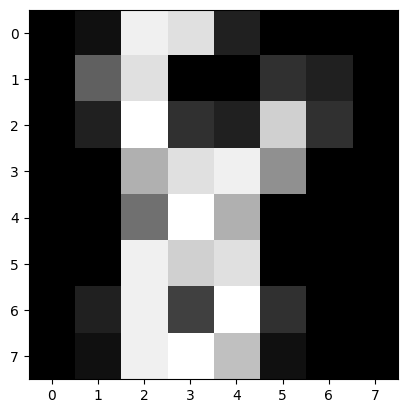

In [25]:
#plt.rcParams['figure.figsize'] = , 2
first_test_image = x_test[1]
plt.imshow(np.reshape(first_test_image, (8,8)), cmap=plt.cm.gray);

In [26]:
x_test[1]

array([ 0.,  1., 15., 14.,  2.,  0.,  0.,  0.,  0.,  6., 14.,  0.,  0.,
        3.,  2.,  0.,  0.,  2., 16.,  3.,  2., 13.,  3.,  0.,  0.,  0.,
       11., 14., 15.,  9.,  0.,  0.,  0.,  0.,  7., 16., 11.,  0.,  0.,
        0.,  0.,  0., 15., 13., 14.,  0.,  0.,  0.,  0.,  2., 15.,  4.,
       16.,  3.,  0.,  0.,  0.,  1., 15., 16., 12.,  1.,  0.,  0.])

In [27]:
x_test[0:1]

array([[ 0.,  0., 11., 16., 15.,  3.,  0.,  0.,  0.,  5., 16., 12., 11.,
        13.,  0.,  0.,  0.,  3., 13.,  1.,  5., 15.,  0.,  0.,  0.,  0.,
         0.,  0., 12., 11.,  0.,  0.,  0.,  0.,  0.,  1., 16.,  7.,  0.,
         0.,  0.,  0.,  0., 10., 15.,  0.,  0.,  0.,  0.,  0., 12., 16.,
        16., 11.,  1.,  0.,  0.,  0., 13., 13.,  8., 13., 16.,  8.]])

In [28]:
logisticRegr.predict(x_test[1:2])
# logisticRegr.predict(x_test[1:2])

array([8])

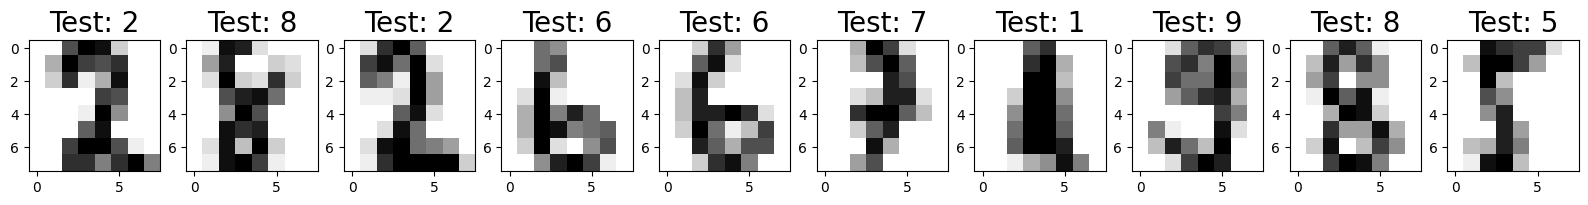

In [29]:
plt.figure(figsize=(20,2))
for index, (image, label) in enumerate(zip(x_test[0:10], y_test[0:10])):
    plt.subplot(1, 10, index + 1)
    plt.title('Test: ' + str(label), fontsize = 20)
    plt.imshow(np.reshape(image, (8,8)), cmap='binary');

In [30]:
# Returns a NumPy Array
# Predict for One Observation (image)
logisticRegr.predict(x_test[:10])

array([2, 8, 2, 6, 6, 7, 1, 9, 8, 5])

In [31]:
y_test[:10]

array([2, 8, 2, 6, 6, 7, 1, 9, 8, 5])

### Probabilities

In [32]:
y_test[1:2]

array([8])

In [ ]:
np.round(logisticRegr.predict_proba(x_test[1:2])[0],2) # % de la probab de la represantacion del 8

array([0.  , 0.  , 0.  , 0.  , 0.08, 0.  , 0.  , 0.  , 0.92, 0.  ])

In [ ]:
np.round(logisticRegr.predict_proba(x_test[7:8])[0],2) # % de la probab de la represantacion del 9

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 1.])

In [48]:
max(logisticRegr.predict_proba(x_test[0:1])[0])

0.9999999986648553

In [27]:
y_test[:10]

array([2, 8, 2, 6, 6, 7, 1, 9, 8, 5])

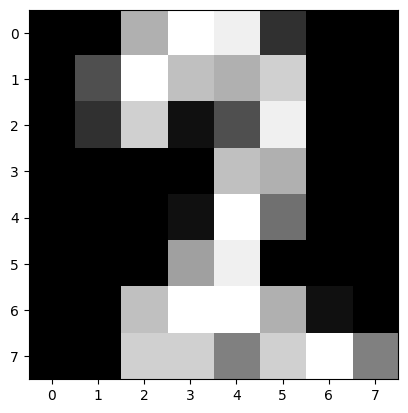

In [28]:
pred = x_test[logisticRegr.predict(x_test) == y_test][0]
plt.imshow(pred.reshape(8,8), cmap=plt.cm.gray);

### Measuring Model Performance (Digits Dataset)

In [49]:
# Use score method to get accuracy of model
score = logisticRegr.score(x_test, y_test)
print(score * 100, "%")

95.33333333333334 %


### Matriz de confusión

Eje horizontal: falso positivo

Eje vertical: falso negativo

In [50]:
import sklearn.metrics as metrics
predictions = logisticRegr.predict(x_test)
cm = metrics.confusion_matrix(y_test, predictions)
print(cm)

[[37  0  0  0  0  0  0  0  0  0]
 [ 0 40  0  0  0  0  0  0  2  1]
 [ 0  0 41  3  0  0  0  0  0  0]
 [ 0  0  0 44  0  0  0  0  1  0]
 [ 0  0  0  0 37  0  0  1  0  0]
 [ 0  0  0  0  0 46  0  0  0  2]
 [ 0  1  0  0  0  0 51  0  0  0]
 [ 0  0  0  1  1  0  0 46  0  0]
 [ 0  3  1  0  0  0  1  0 43  0]
 [ 0  0  0  0  0  1  0  0  2 44]]


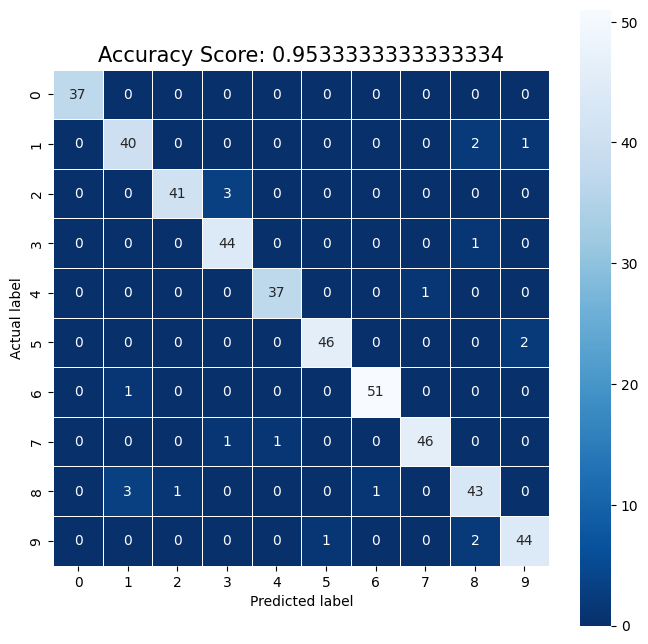

In [51]:
import seaborn as sns

plt.figure(figsize=(8,8))
sns.heatmap(cm, annot=True, linewidths=.5, square = True, cmap = 'Blues_r')
plt.ylabel('Actual label')
plt.xlabel('Predicted label')
all_sample_title = 'Accuracy Score: {0}'.format(score)
plt.title(all_sample_title, size = 15);

<Axes: >

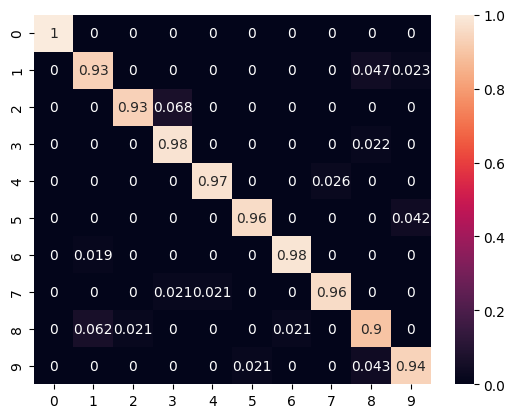

In [52]:
sns.heatmap(metrics.confusion_matrix(y_test, predictions, normalize='true'), annot=True)

In [53]:
from sklearn.metrics import multilabel_confusion_matrix

multilabel_confusion_matrix(y_test, predictions)

array([[[413,   0],
        [  0,  37]],

       [[403,   4],
        [  3,  40]],

       [[405,   1],
        [  3,  41]],

       [[401,   4],
        [  1,  44]],

       [[411,   1],
        [  1,  37]],

       [[401,   1],
        [  2,  46]],

       [[397,   1],
        [  1,  51]],

       [[401,   1],
        [  2,  46]],

       [[397,   5],
        [  5,  43]],

       [[400,   3],
        [  3,  44]]], dtype=int64)

In [54]:
from sklearn.metrics import classification_report

In [55]:
print(classification_report(y_test, predictions))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        37
           1       0.91      0.93      0.92        43
           2       0.98      0.93      0.95        44
           3       0.92      0.98      0.95        45
           4       0.97      0.97      0.97        38
           5       0.98      0.96      0.97        48
           6       0.98      0.98      0.98        52
           7       0.98      0.96      0.97        48
           8       0.90      0.90      0.90        48
           9       0.94      0.94      0.94        47

    accuracy                           0.95       450
   macro avg       0.95      0.95      0.95       450
weighted avg       0.95      0.95      0.95       450

